- Has the network latency gone up since we switched internet service providers?

Ho:  the network latency did not change since we switched internet service providers.
Ha:  the network latency has gone up since we switched internet service providers.

True positive: Rejecting the null hypothesis when it's false. Change has been detected.
True negative: Accepting Ho when it's true. Change has not been detected.
Type I: Rejecting the Ho when it's true. Falsely concluded that there is a change while in reality there was not.
Type II: Accepting the Ho when it's False. Falsely concluded there is no change when there is a change.

- Is the website redesign any good?

Ho: webredesign is the same as previous webdesign
Ha: webredeign is better than previous webdesign

True positive: Rejecting the null hypothesis when it's false. Webredesign is better.
True negative: Accepting Ho when it's true. webredisgn is the same.
Type I: Rejecting the Ho when it's true. Falsely concluded that webredesign is better where in reality they are the same.
Type II: Accepting the Ho when it's False. Falsely concluded webredesign is the same where in reality webredisgn is better.

- Is our television ad driving more sales?

Ho: our television ad does not affect sales
Ha: our television ad drives more sales

True positive: Rejecting the null hypothesis when it's false. tele ad drives more sales.
True negative: Accepting Ho when it's true. tele ad does not affect sales
Type I: Rejecting the Ho when it's true. Falsely concluded that tele ad drives more sales when in reality it does not affect the sales.
Type II: Accepting the Ho when it's False. Falsely concluded tele ad does not affect sales when in reality it drives more sales.

# -------------------------- Chi Square exercises ---------------------------- #

# 1. Does using a Macbook and being a Codeup student are independent of each other.

Ho: using a Macbook and being a Codeup student are independent of each other.
Ha: using a Macbook and being a Codeup student are dependent of each other.

In [4]:
import pandas as pd
import numpy as np

from pydataset import data
from scipy import stats

In [132]:
data = {
    'codeup': ['yes', 'no'],
    'mac': [49, 1],
    'notmac':[20,30]
}

df = pd.DataFrame(data)
df = df.set_index('codeup')
df

,mac,notmac
codeup,,
yes,49,20
no,1,30


In [84]:
alpha = 0.05

In [79]:
chi2,p,degf,expected = stats.chi2_contingency(df)
p

1.4116760526193828e-09

In [82]:
print('df')
print(df.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

df
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [86]:
if p < alpha:
    print('reject the null hypothesis, using a Macbook and being a Codeup student are dependent of each other. ')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis, using a Macbook and being a Codeup student are dependent of each other. 


# 2. Choose another 2 categorical variables from the mpg dataset.

In [ ]:
# State your null and alternative hypotheses.
Ho: year has no impact on city mile per gallon
Ha: year has impact on city mile per gallon

In [138]:
mpg = data('mpg')
data('mpg',show_doc =True)
mpg.head(5)


mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
# State your alpha.
alpha = 0.05

In [98]:
# Perform a chi square test of independence.
observed = pd.crosstab(mpg.year,mpg.cty)
observed

cty,9,11,12,13,14,15,16,17,18,19,...,21,22,23,24,25,26,28,29,33,35
year,,,,,,,,,,,,,,,,,,,,,
1999,0,16,0,7,9,16,10,5,21,11,...,11,0,1,4,1,1,1,1,1,1
2008,5,4,8,14,10,8,9,11,5,9,...,12,4,2,1,1,2,1,0,0,0


In [100]:
chi2,p,degf,expected = stats.chi2_contingency(observed)

In [101]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0 16  0  7  9 16 10  5 21 11  0 11  0  1  4  1  1  1  1  1  1]
 [ 5  4  8 14 10  8  9 11  5  9 11 12  4  2  1  1  2  1  0  0  0]]

Expected
[[ 2 10  4 10  9 12  9  8 13 10  5 11  2  1  2  1  1  1  0  0  0]
 [ 2 10  4 10  9 12  9  8 13 10  5 11  2  1  2  1  1  1  0  0  0]]

----
chi^2 = 58.1116
p     = 0.0000


In [103]:
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis, year has impact on city mile per gallon')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis, year has impact on city mile per gallon


# 3 Use the data from the employees database to answer these questions:

In [85]:
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [91]:
query = pd.read_sql(

'''
select *
from employees
join dept_emp using(emp_no)
join departments using(dept_no)

where dept_emp.to_date > now()
and dept_name in ('sales','marketing')
'''

, url)


In [92]:
query.head(5)

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Ho: independent
Ha: dependent

In [93]:
observed = pd.crosstab(query.gender,query.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [94]:
chi2,p,degf,expected = stats.chi2_contingency(observed)

In [95]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [96]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis, gender is independent of department names')

fail to reject the null hypothesis, gender is independent of department names


In [123]:
query.head()

,manager_emp_no,gender,dept_name,emp_no
0,111692,M,Customer Service,10038
1,111784,M,Customer Service,10038
2,111877,M,Customer Service,10038
3,111939,M,Customer Service,10038
4,111692,F,Customer Service,10049


In [124]:
observed = pd.crosstab(query.gender, query.manager_emp_no)

manager_emp_no,110022,110039,110085,110114,110183,110228,110303,110344,110386,110420,...,110800,110854,111035,111133,111400,111534,111692,111784,111877,111939
gender,,,,,,,,,,,,,,,,,,,,,
F,5864,5864,5014,5014,5147,5147,21393,21393,21393,21393,...,5872,5872,14999,14999,6181,6181,7007,7007,7007,7007
M,8978,8978,7423,7423,7751,7751,31911,31911,31911,31911,...,8674,8674,22702,22702,9260,9260,10562,10562,10562,10562


In [125]:
chi2,p,degf,expected = stats.chi2_contingency(observed)

In [126]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 28028  49066  10028  10294  11728  85572  23488  12362  29998]
 [ 42248  73706  14846  15502  17956 127644  34696  18520  45404]]

Expected
[[ 28124  49133   9954  10323  11879  85328  23285  12358  30175]
 [ 42151  73638  14919  15472  17804 127887  34898  18523  45226]]

----
chi^2 = 10.8187
p     = 0.2122


In [129]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


# ------------------------- Pearson's Correlation -----------------------------

#1 

Is there a relationship between the length of your arm and the length of your foot?
- Pearson's correlation

Does smoking affect when or not someone has lung cancer?
- Chi square

Is gender independent of a person’s blood type?
- Chi square

Does whether or not a person has a cat or dog affect whether they live in an apartment?
- Chi square

#2 Use the telco_churn data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [3]:
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [59]:
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

query = pd.read_sql(

'''
select customers.tenure,customers.monthly_charges,customers.total_charges
from customers

'''

, url)
query.head()

,tenure,monthly_charges,total_charges
0,9,65.6,593.3
1,9,59.9,542.4
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.4


In [30]:
query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   monthly_charges  7043 non-null   float64
 2   total_charges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


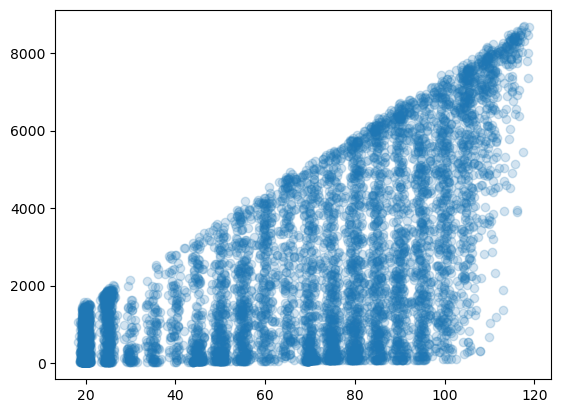

In [47]:
plt.scatter(query.monthly_charges,query.total_charges,alpha = 0.2)

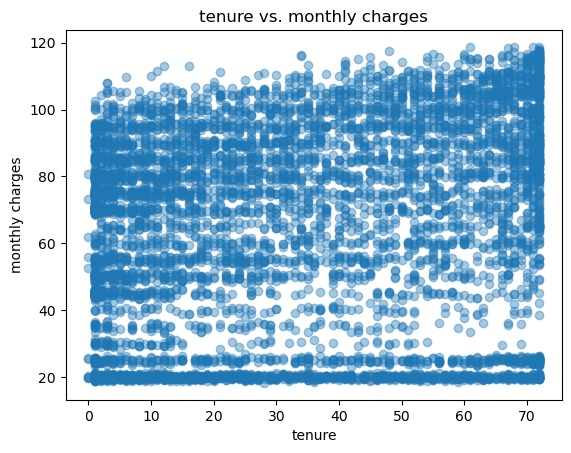

reject the null hypothesis, tenure correlate with monthly charges,with a pearson coefficient of 0.24789985628615246


In [13]:
#Does tenure correlate with monthly charges?

#Ho = not correlate
#Ha = Yes correlate

r,p=stats.pearsonr(query.tenure,query.monthly_charges)


plt.scatter(query.tenure,query.monthly_charges, alpha = 0.4)
plt.title('tenure vs. monthly charges')
plt.xlabel('tenure')
plt.ylabel('monthly charges')
plt.show()


alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis, tenure correlate with monthly charges,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis, tenure correlate with total charges,with a pearson coefficient of 0.8258804609332071


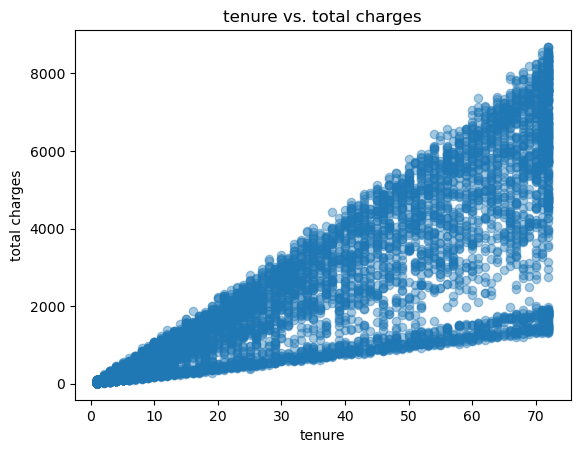

In [60]:
#Total charges?
#Ho = not correlate
#Ha = Yes correlate

query['total_charges'] = pd.to_numeric(query['total_charges'], errors='coerce')
#query['total_charges'] = query['total_charges'].astype(float)
#np.isnan(query['total_charges'])
#query_filtered = query.dropna()

r,p=stats.pearsonr(query_filtered.tenure,query_filtered.total_charges)
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis, tenure correlate with total charges,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')
    
    
plt.scatter(query.tenure,query.total_charges,alpha = 0.4)
plt.title('tenure vs. total charges')
plt.xlabel('tenure')
plt.ylabel('total charges')
plt.show()

In [57]:
#What happens if you control for phone and internet service?

q2 = pd.read_sql(

'''
select tenure,monthly_charges,total_charges,phone_service,internet_service_type_id
from customers
where phone_service in ('Yes')
and internet_service_type_id = 3
'''
, url)
q2.head()

,tenure,monthly_charges,total_charges,phone_service,internet_service_type_id
0,9,65.6,593.3,Yes,1
1,9,59.9,542.4,Yes,1
2,4,73.9,280.85,Yes,2
3,13,98.0,1237.85,Yes,2
4,3,83.9,267.4,Yes,2


In [58]:
q2['total_charges'] = pd.to_numeric(query['total_charges'], errors='coerce')

# Now, convert the column to float
#q2['total_charges'] = q2['total_charges'].astype(float)

In [246]:
#Ho = not correlate
#Ha = Yes correlate

r,p=stats.pearsonr(q2.tenure,q2.monthly_charges)
r,p

(0.34232562306194525, 3.356186955193874e-43)

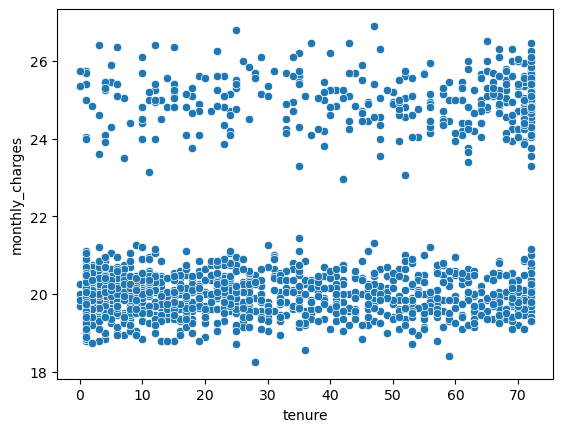

In [247]:
sns.scatterplot(data= q2,x = 'tenure',y = 'monthly_charges')

plt.show()

In [248]:
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis, tenure correlate with monthly charges,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis, tenure correlate with monthly charges,with a pearson coefficient of 0.34232562306194525


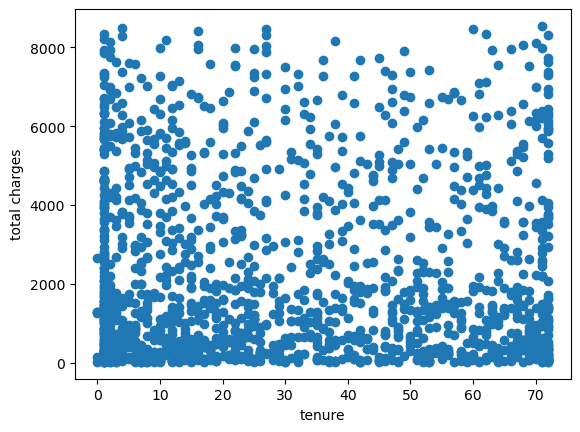

In [249]:
plt.scatter(q2.tenure,q2.total_charges)

plt.xlabel('tenure')
plt.ylabel('total charges')
plt.show()

In [251]:
nan_in_total_charges = np.isnan(q2['total_charges'])

# Filter out rows with NaN values in 'total_charges' column
q2 = q2.dropna()


In [252]:
r,p=stats.pearsonr(q2.tenure,q2.total_charges)
r,p

(-0.0063203589687022025, 0.8052038844458538)

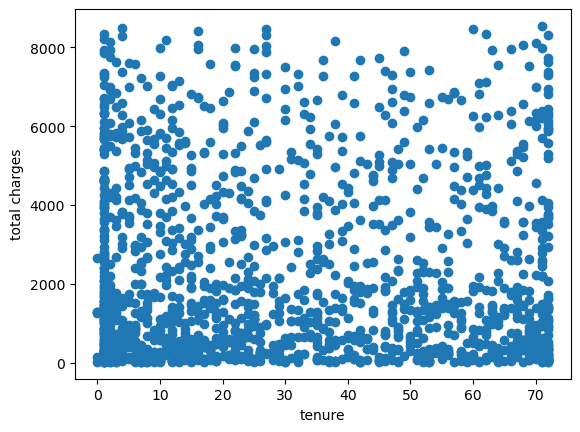

In [253]:
plt.scatter(q2.tenure,q2.total_charges)

plt.xlabel('tenure')
plt.ylabel('total charges')
plt.show()

In [254]:
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis, tenure correlate with monthly charges,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


#3 Use the employees database

In [5]:
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
s = pd.read_sql(

'''
select * from salaries
'''

, url)
s

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [6]:
#s['from_date'] = pd.to_datetime(s['from_date'])
#s['to_date'] = pd.to_datetime(s['to_date'],errors = 'coerce')
s['worktime'] = (s['to_date'] - s['from_date'])
s.sort_values(by='worktime', ascending = False)

,emp_no,salary,from_date,to_date,worktime
0,10001,60117,1986-06-26,1987-06-26,"365 days, 0:00:00"
1,10001,62102,1987-06-26,1988-06-25,"365 days, 0:00:00"
2,10001,66074,1988-06-25,1989-06-25,"365 days, 0:00:00"
3,10001,66596,1989-06-25,1990-06-25,"365 days, 0:00:00"
4,10001,66961,1990-06-25,1991-06-25,"365 days, 0:00:00"
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,"365 days, 0:00:00"
2844043,499999,67043,1998-11-30,1999-11-30,"365 days, 0:00:00"
2844044,499999,70745,1999-11-30,2000-11-29,"365 days, 0:00:00"
2844045,499999,74327,2000-11-29,2001-11-29,"365 days, 0:00:00"


In [10]:
#np.isnan(s['worktime']).sum()
s.info()
s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
 4   worktime   object
dtypes: int64(2), object(3)
memory usage: 108.5+ MB


,emp_no,salary,from_date,to_date,worktime
0,10001,60117,1986-06-26,1987-06-26,"365 days, 0:00:00"
1,10001,62102,1987-06-26,1988-06-25,"365 days, 0:00:00"
2,10001,66074,1988-06-25,1989-06-25,"365 days, 0:00:00"
3,10001,66596,1989-06-25,1990-06-25,"365 days, 0:00:00"
4,10001,66961,1990-06-25,1991-06-25,"365 days, 0:00:00"
...,...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30,"365 days, 0:00:00"
2844043,499999,67043,1998-11-30,1999-11-30,"365 days, 0:00:00"
2844044,499999,70745,1999-11-30,2000-11-29,"365 days, 0:00:00"
2844045,499999,74327,2000-11-29,2001-11-29,"365 days, 0:00:00"


In [308]:
s.isna().sum()

emp_no       0
salary       0
from_date    0
to_date      0
worktime     0
dtype: int64

# Is there a relationship between how long an employee has been with the company and their salary?

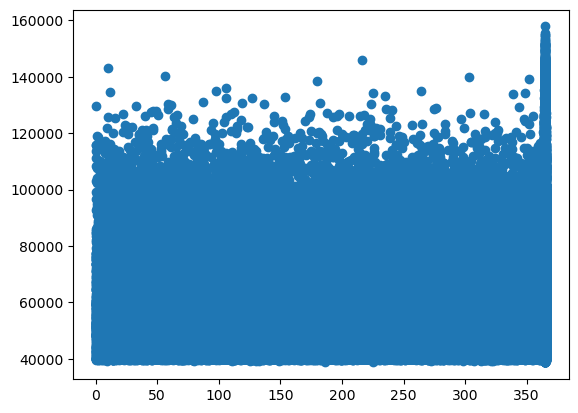

In [311]:
plt.scatter(s.worktime,s.salary)

In [312]:
r,p=stats.pearsonr(s.worktime,s.salary)
r,p

(0.011473845089102817, 1.5464493141203087e-76)

In [313]:
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis,with a pearson coefficient of 0.011473845089102817


In [ ]:
#Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [98]:
t = pd.read_sql(

'''
select * from titles
'''

, url)
t

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [104]:
t['from_date'] = pd.to_datetime(t['from_date'])
t['to_date'] = pd.to_datetime(t['to_date'],errors = 'coerce')
t['worktime'] = (t['to_date'] - t['from_date']).dt.days
title_counts = t.groupby('emp_no')['title'].nunique()


In [107]:
t['title_counts'] = t.groupby('emp_no')['title'].nunique()


In [110]:
t.isna().sum()

emp_no          0
title           0
from_date       0
to_date         0
worktime        0
title_counts    0
dtype: int64

In [109]:

t = t.dropna(subset=['title_counts', 'worktime'])
t


,emp_no,title,from_date,to_date,worktime,title_counts
10002,16771,Staff,1989-06-19,1994-06-19,1826.0,1.0
10006,16774,Staff,1987-07-02,1995-07-02,2922.0,1.0
10007,16775,Assistant Engineer,1992-09-07,1997-09-07,1826.0,2.0
10010,16777,Senior Staff,1988-04-25,1993-02-16,1758.0,1.0
10011,16778,Engineer,1990-10-25,1996-10-24,2191.0,1.0
...,...,...,...,...,...,...
443297,499992,Staff,1987-05-10,1992-05-09,1826.0,1.0
443299,499994,Engineer,1993-02-22,1993-10-27,247.0,1.0
443301,499996,Engineer,1996-05-13,2002-05-13,2191.0,1.0
443303,499997,Engineer,1987-08-30,1992-08-29,1826.0,2.0


In [112]:
stats.pearsonr(t.title_counts,t.worktime)


PearsonRResult(statistic=0.003987147877998281, pvalue=0.1828869409491346)

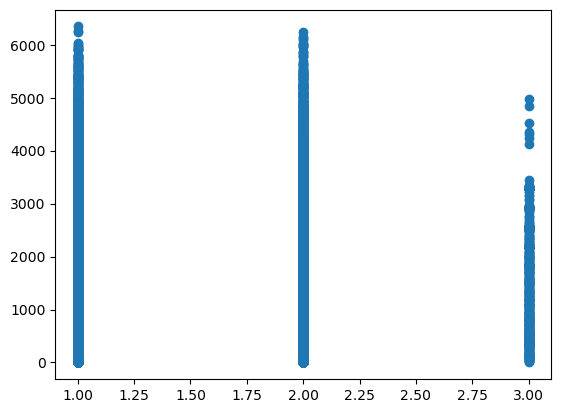

In [363]:
plt.scatter(t.title_counts,t.worktime)

In [368]:
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


4. Use the sleepstudy data.

In [ ]:
# Is there a relationship between days and reaction time?

In [358]:
ss = data('sleepstudy')
ss.head()
data('sleepstudy',show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [354]:
r,p = stats.pearsonr(ss.Days,ss.Reaction)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.894096322214486e-15)

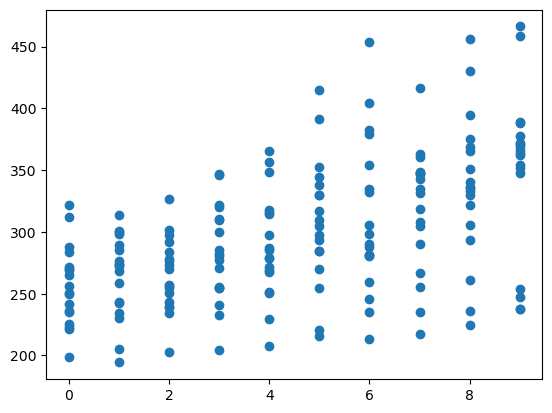

In [355]:
plt.scatter(ss.Days,ss.Reaction)

In [356]:
alpha = 0.05
if p < alpha:
    print(f'reject the null hypothesis,with a pearson coefficient of {r}')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis,with a pearson coefficient of 0.011473845089102817


#  ----------------------- Mean Testing Exercises ----------------------------

#1 
- Is there a difference in grades of students on the second floor compared to grades of all students?
one sample 2 tailed t test

- Are adults who drink milk taller than adults who don't drink milk?
two sample 1 tailed t test

- Is the price of gas higher in Texas or in New Mexico?
two sample 2 tailed test

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
ANOVA test

#2 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- two sample two tailed

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [4]:
o1 = np.random.normal(90,15,size=(40))
o2 = np.random.normal(100,20,size=(50)) #passed normality parameter

In [14]:
o1.var()==o2.var()#failed variance parameter

False

In [ ]:
# Another way

stats.ttest_ind_from_stats()

In [15]:
Ho = 'average time takes to sell homes is the same for office A and B'
Ha = 'average time takes to sell homes is different for office A and B'

In [10]:
alpha = 0.05
t, p = stats.ttest_ind(o1, o2, equal_var=False)
t, p

(-2.5417888240516557, 0.012788292331563962)

In [98]:
if p > alpha:
    print(f'We fail to reject the null hypothesis:{Ho}')

else:
    print("We reject the null hypothesis")


We reject the null hypothesis


#3

Load the mpg dataset and use it to answer the following questions:

- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [29]:
from pydataset import data
mpg = data('mpg')
mpg.info()
mpg.head()
data('mpg',show_doc = True)

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB
mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fu

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

two sample two tailed test.

In [37]:
Ho = 'there is no difference in fuel-efficiency in cars from 2008 vs 1999'
Ha = 'there is difference in fuel-efficiency in cars from 2008 vs 1999'

In [45]:
car_99 = (mpg[mpg.year==1999]).cty
car_08 = (mpg[mpg.year==2008]).cty

In [46]:
car_99.var() == car_08.var() #failed equal variance test

False

In [47]:
print(stats.shapiro(car_99))
print(stats.shapiro(car_08)) #both passed normality test, as the statistic is close to 1

ShapiroResult(statistic=0.9074150323867798, pvalue=6.315570999504416e-07)
ShapiroResult(statistic=0.9753812551498413, pvalue=0.02993030473589897)


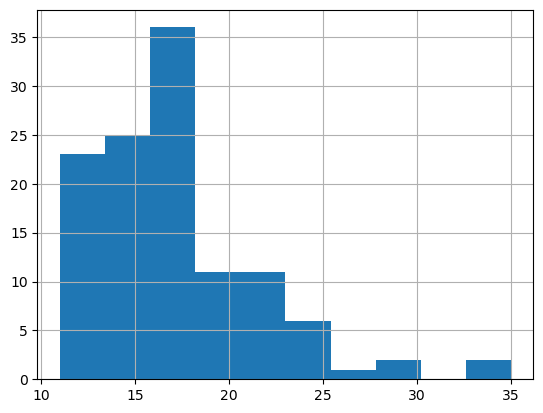

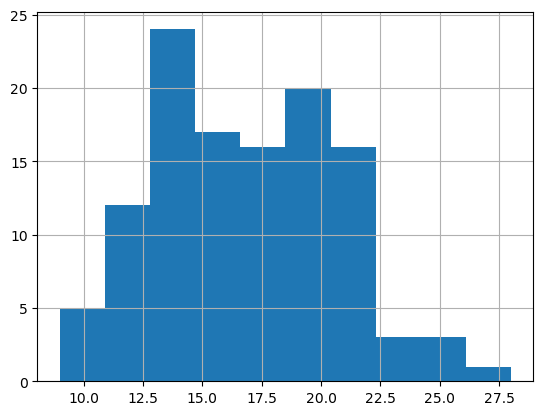

In [50]:
car_99.hist()
plt.show()
car_08.hist()
plt.show()

In [52]:
alpha = 0.05
t, p = stats.ttest_ind(car_99, car_08, equal_var=False)
t, p

(0.5674988409997608, 0.5709289258613233)

In [53]:
if p / 2 > alpha:
    print(f'We fail to reject the null hypothesis:{Ho}')
elif t < 0:
    print(f"We fail to reject the null hypothesis:{Ho}")
else:
    print("We reject the null hypothesis")


We fail to reject the null hypothesis:there is no difference in fuel-efficiency in cars from 2008 vs 1999


- Are compact cars more fuel-efficient than the average car?

1 sample 1 tail t test

In [70]:
mpg.head()
mpg['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [76]:
compact = mpg[mpg['class'].str.startswith('com')].cty
avg = mpg['cty'].mean()

16.858974358974358

In [75]:
compact.var() == avg.var()

False

In [71]:
print(stats.shapiro(compact))
print(stats.shapiro(avg))  #close to 1, pass normality test

ShapiroResult(statistic=0.8873253464698792, pvalue=0.0002908567839767784)
ShapiroResult(statistic=0.956788182258606, pvalue=1.743796360642591e-06)


In [77]:
alpha = 0.05
t, p = stats.ttest_1samp(compact, avg)
t, p


(6.619104253440891, 3.401744821639401e-08)

In [79]:
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We failed to reject the null hypothesis")


We reject the null hypothesis


- Do manual cars get better gas mileage than automatic cars?
2 sample one tail t test

In [81]:
mpg.head()
mpg.trans.value_counts()

trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64

In [88]:
man = mpg[mpg['trans'].str.startswith('auto')].cty
auto = mpg[mpg['trans'].str.startswith('manu')].cty

In [89]:
man.var() == auto.var() #failed the equal variance test

False

In [90]:
print(stats.shapiro(auto))
print(stats.shapiro(man)) # passed normality test

ShapiroResult(statistic=0.9263180494308472, pvalue=0.0002550499339122325)
ShapiroResult(statistic=0.9660839438438416, pvalue=0.0006670693401247263)


In [91]:
alpha = 0.05
t, p = stats.ttest_ind(man, auto, equal_var=False)
t, p

(-4.537543658735826, 1.2633643745317665e-05)

In [93]:
if p / 2 > alpha:
    print(f'We fail to reject the null hypothesis')
elif t < 0:
    print(f"We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis
